In [12]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import requests

from glob import glob

import IPython.display as ipd
#from tqdm import tqdm

import subprocess

plt.style.use('ggplot')

from pytube import YouTube

In [4]:
! pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 1.3 MB/s eta 0:00:00a 0:00:01


# Import a video using PyTube

In [6]:
yt = YouTube('https://www.youtube.com/watch?v=gO8N3L_aERg')

### Get video info

In [7]:
yt.title

'Fire Drill  - The Office US'

In [14]:
yt.thumbnail_url

'https://i.ytimg.com/vi/gO8N3L_aERg/sddefault.jpg'

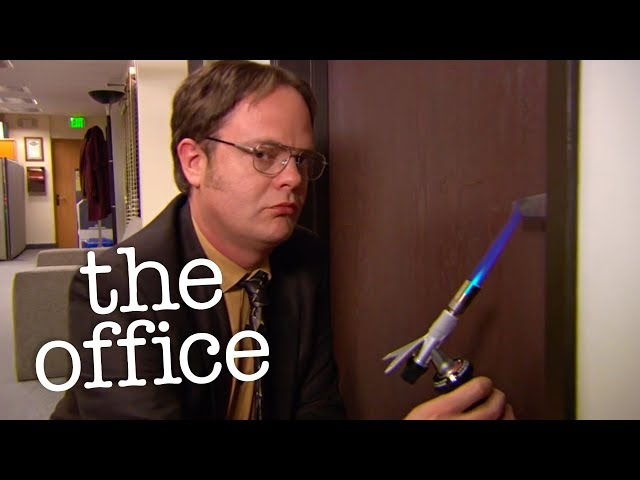

In [13]:
ipd.Image(requests.get(yt.thumbnail_url).content)

# Download video and show

In [28]:
# Streams, different quality versions of video
list(yt.streams.filter(file_extension='mp4'))

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="24fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="22" mime_type="video/mp4" res="720p" fps="24fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="136" mime_type="video/mp4" res="720p" fps="24fps" vcodec="avc1.4d401f" progressive="False" type="video">,
 <Stream: itag="398" mime_type="video/mp4" res="720p" fps="24fps" vcodec="av01.0.05M.08" progressive="False" type="video">,
 <Stream: itag="135" mime_type="video/mp4" res="480p" fps="24fps" vcodec="avc1.4d401e" progressive="False" type="video">,
 <Stream: itag="397" mime_type="video/mp4" res="480p" fps="24fps" vcodec="av01.0.04M.08" progressive="False" type="video">,
 <Stream: itag="134" mime_type="video/mp4" res="360p" fps="24fps" vcodec="avc1.4d401e" progressive="False" type="video">,
 <Stream: itag="396" mime_type="video/mp4" res="360p" fps="24fps" vcodec="av01.0.01M.08" progressive="False"

In [29]:
stream = yt.streams.get_by_itag(18)
stream.download()

'/home/daniel/code/dosorio79/code/kolapally/computer_vision/notebooks/video_analysis/Fire Drill  - The Office US.mp4'

In [38]:
video_path = '/home/daniel/code/dosorio79/code/kolapally/computer_vision/notebooks/video_analysis/Fire Drill  - The Office US.mp4'

In [39]:
ipd.Video(video_path, width=700)

# Open video in cv2 - Check properties

In [33]:
# Load in video capture
cap = cv2.VideoCapture('/home/daniel/code/dosorio79/code/kolapally/computer_vision/notebooks/video_analysis/Fire Drill  - The Office US.mp4')

In [35]:
# Total number of frames in video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

7114.0

In [36]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 360.0, Width 640.0


In [37]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 23.98


# Plot and get frames

In [41]:
# cap.read returns true and an frame until there are no more frames then returns false
cap = cv2.VideoCapture(video_path)
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (360, 640, 3)


In [47]:
cap.release()

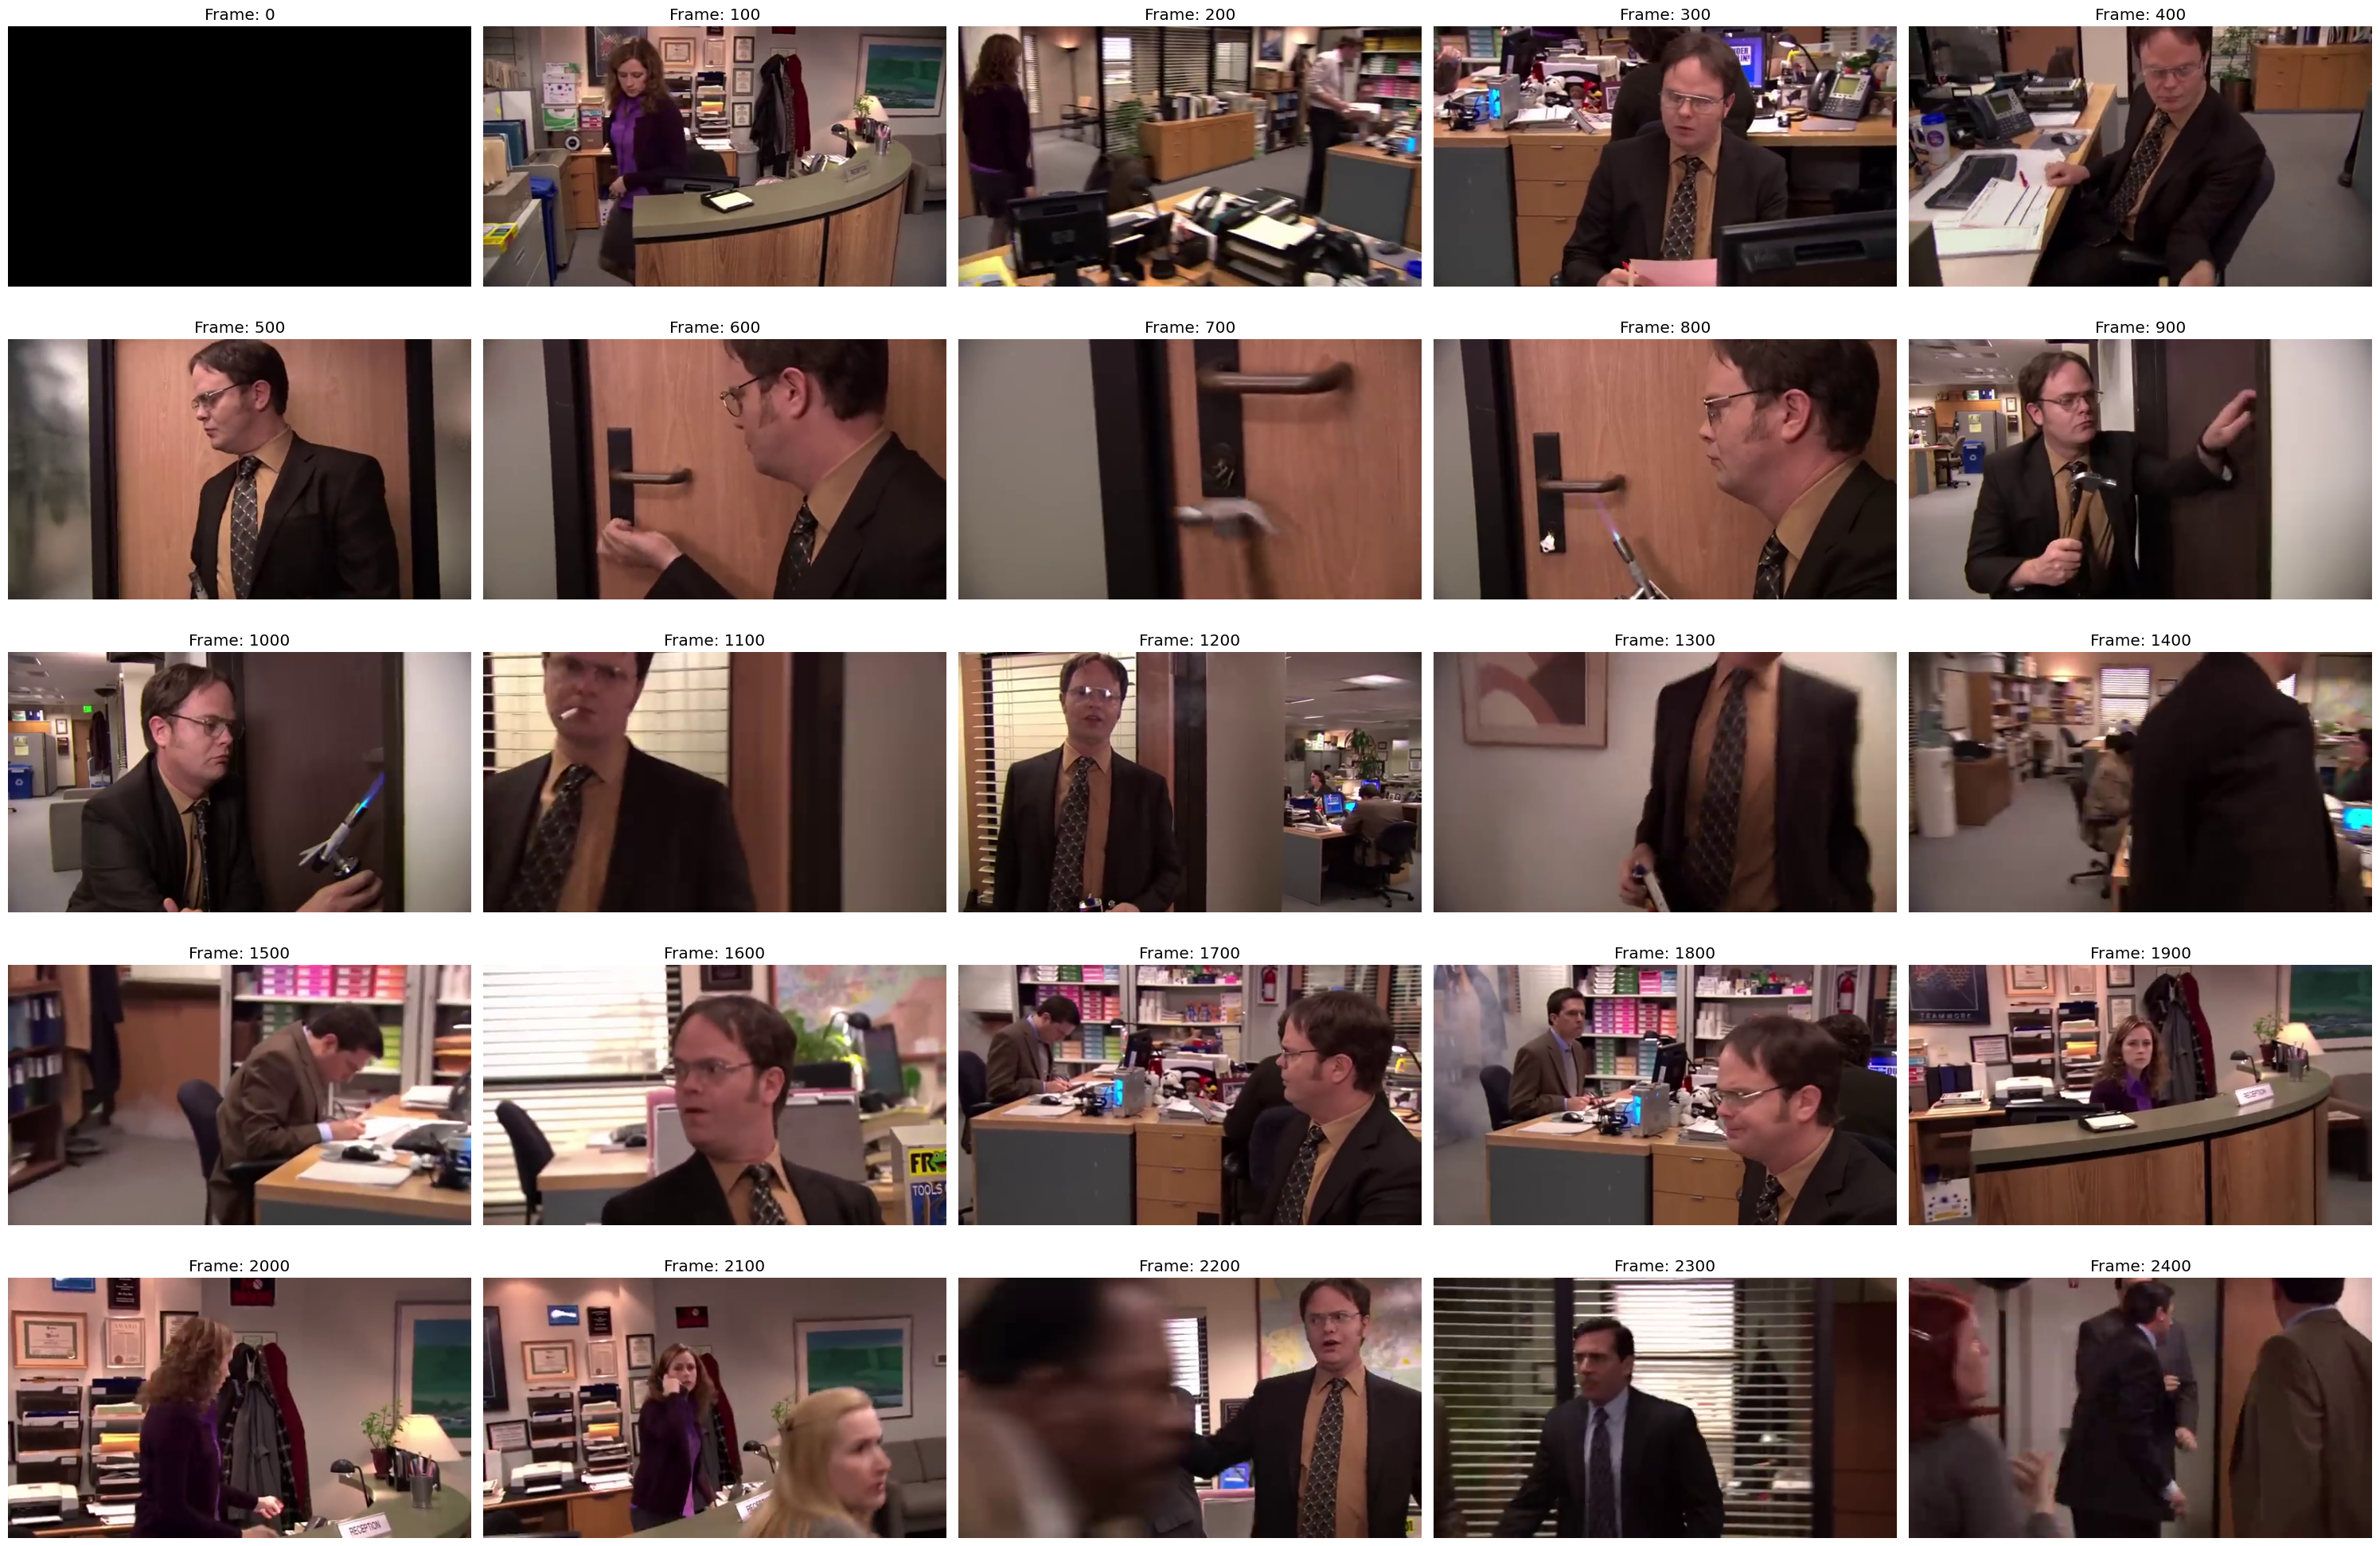

In [48]:
# Ploting every 100th frame
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture(video_path)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(2500):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 100 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

In [52]:
# Get a specific frame - This was on the tutorial, probably could use a better loop strategy

frame_capture = 1000

cap = cv2.VideoCapture(video_path)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame == frame_capture:
        break
cap.release()

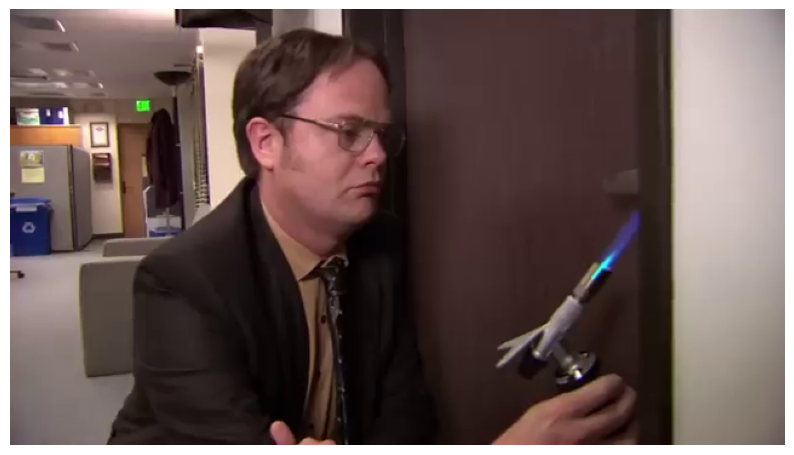

In [53]:
## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")
    
display_cv2_img(img)